##### Assessing the Dynamics of CO2 Emissions and Energy Consumption: A Global Perspective

#### 1. Introduction

The global landscape is undergoing unprecedented transformations with profound implications for environmental sustainability. In this context, the intersection of energy consumption and CO2 emissions has emerged as a critical focal point for policymakers and researchers alike. As the world grapples with the challenges of climate change and seeks viable pathways towards a sustainable future, understanding the dynamics of CO2 emissions and energy consumption becomes imperative.

This research embarks on a comprehensive analysis, delving into the intricate interplay between global CO2 emissions and energy consumption patterns. The dataset under scrutiny encapsulates a wealth of information, spanning several decades and encompassing diverse nations. With a keen focus on fostering a nuanced understanding of the complexities at play, our investigation aims to unveil overarching trends, identify key contributors to emissions, and discern the impact of energy policies on the global carbon footprint.

The overarching goal of this research is to provide insights that can inform evidence-based energy policies, guiding nations towards more sustainable practices. By exploring the historical evolution of CO2 emissions, scrutinizing the sources of emissions, and dissecting the intricacies of energy consumption patterns, we endeavor to contribute valuable knowledge to the discourse surrounding global energy and environmental policies.

Through the lenses of economic growth, renewable energy utilization, and the consequences of land-use change, this study seeks to unravel connections that can inform policymakers in their pursuit of effective strategies. As we delve into the complexities of the dataset, we anticipate uncovering trends that will not only deepen our understanding of the global energy landscape but also pave the way for informed decision-making towards a more sustainable and resilient future.

#### 2. About the Dataset

The dataset at hand offers a comprehensive overview of global CO2 emissions and related factors, encapsulating a wide array of information spanning multiple decades and countries. It encompasses diverse dimensions, including population, GDP, energy consumption, and various sources of CO2 emissions. With a total of 69 columns, each representing a unique aspect of the carbon emissions landscape, the dataset provides a granular insight into the complexities of the global carbon footprint. Notable variables include country-specific data, such as population and GDP, and sector-specific emissions, ranging from industrial activities to energy production. The temporal scope of the dataset, ranging from the 1950s to 2022, allows for a historical analysis of trends and shifts in emissions patterns. However, the dataset also exhibits missing values in several columns, necessitating careful handling during analysis. In essence, this dataset serves as a rich resource for researchers and policymakers aiming to explore the multifaceted dynamics of global CO2 emissions, offering the potential for nuanced insights into the factors driving environmental change on a global scale. More about the data resource can be found from Our World in Data: https://ourworldindata.org/data-review-air-pollution-deaths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('co2-emission-dataset.csv')

In [ ]:
# Continue with the exploration
print("\nInfo about the dataset:")
print(df.info())

In [92]:
# Display the first few rows of the dataset
print(df.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   

In [93]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
})

# Display columns with missing values
print("\nColumns with Missing Values:")
print(missing_info[missing_info['Missing Percentage'] > 0])


Columns with Missing Values:
                                                  Column  Missing Percentage
iso_code                                        iso_code           17.356111
population                                    population           17.818053
gdp                                                  gdp           69.694952
cement_co2                                    cement_co2           50.551417
cement_co2_per_capita              cement_co2_per_capita           54.186608
...                                                  ...                 ...
temperature_change_from_n2o  temperature_change_from_n2o           21.719589
total_ghg                                      total_ghg           86.778476
total_ghg_excluding_lucf        total_ghg_excluding_lucf           86.778476
trade_co2                                      trade_co2           90.848558
trade_co2_share                          trade_co2_share           90.850639

[77 rows x 2 columns]


check for the missing values of targeted variables

In [94]:
# Specify the variables of interest
variables_of_interest = ['co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'land_use_change_co2',
                           'energy_per_capita', 'gdp',]

# Check for missing values in the specified variables
missing_values = df[variables_of_interest].isnull().sum()

# Display the number of missing values for each variable
print("Number of missing values for each variable:")
print(missing_values)


Number of missing values for each variable:
co2                    17750
coal_co2               22983
oil_co2                22947
gas_co2                22975
cement_co2             24294
flaring_co2            23066
land_use_change_co2    11036
energy_per_capita      37997
gdp                    33494
dtype: int64


#### Posing the Question

1. How has the global CO2 emission landscape evolved over the years?
2. What are the major sources of CO2 emissions and their contributions?
3. How does energy consumption per capita vary across countries and what factors influence it?
4. Is there a positive correlation between economic growth (GDP) and CO2 emissions?
5. Is land-use change significantly contributes to CO2 emissions?

### Descriptive Statistics

## How has the global CO2 emission landscape evolved over the years?

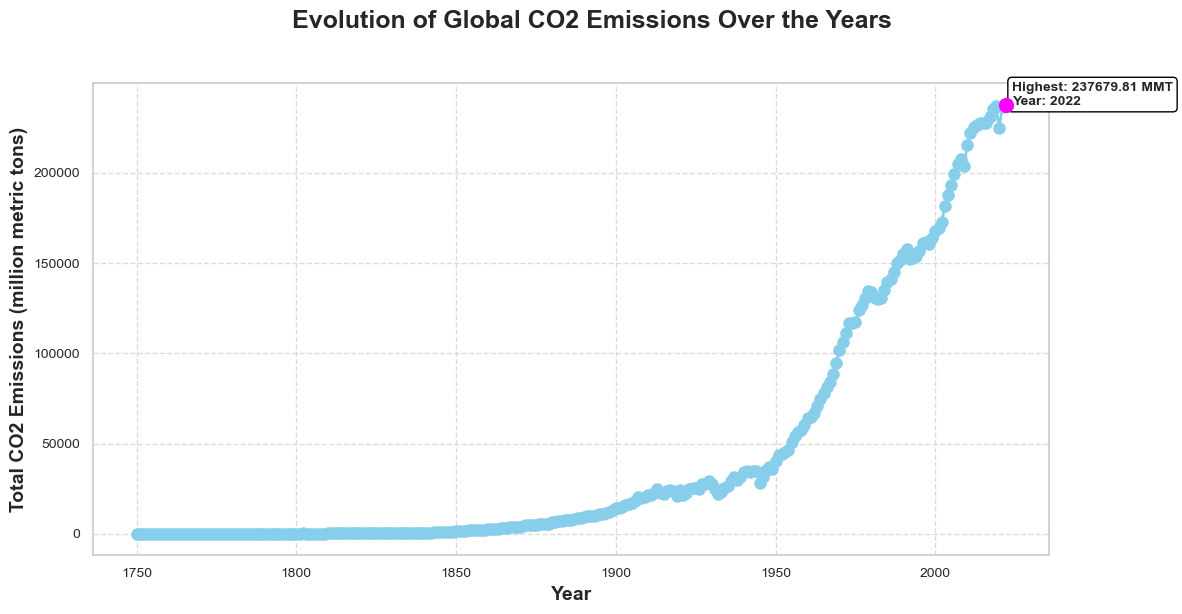

In [45]:
import matplotlib.pyplot as plt

# Group by year and calculate the sum of CO2 emissions for each year
global_emissions_by_year = df.groupby('year')['co2'].sum()

# Find the year with the maximum CO2 emissions
max_year = global_emissions_by_year.idxmax()
max_emissions = global_emissions_by_year.max()

# Plot the evolution of global CO2 emissions over the years
plt.figure(figsize=(12, 6))

plt.plot(global_emissions_by_year.index, global_emissions_by_year.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)

plt.suptitle('Evolution of Global CO2 Emissions Over the Years', fontsize=18, fontweight='bold', y=1.02)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total CO2 Emissions (million metric tons)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.scatter(max_year, max_emissions, color='magenta', s=100, zorder=5)
plt.annotate(f'Highest: {max_emissions:.2f} MMT\nYear: {max_year}', 
             xy=(max_year, max_emissions), 
             xytext=(max_year + 2, max_emissions + 20), 
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
             arrowprops=dict(facecolor='black', arrowstyle="wedge,tail_width=0.7", alpha=0.5))

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

plt.show()


Overtime, global co2 emissions are increasing. The data shows Carbon dioxide (CO₂) emissions from fossil fuels and industry from 1750 to 2022. 

## What are the major sources of CO2 emissions and their contributions?

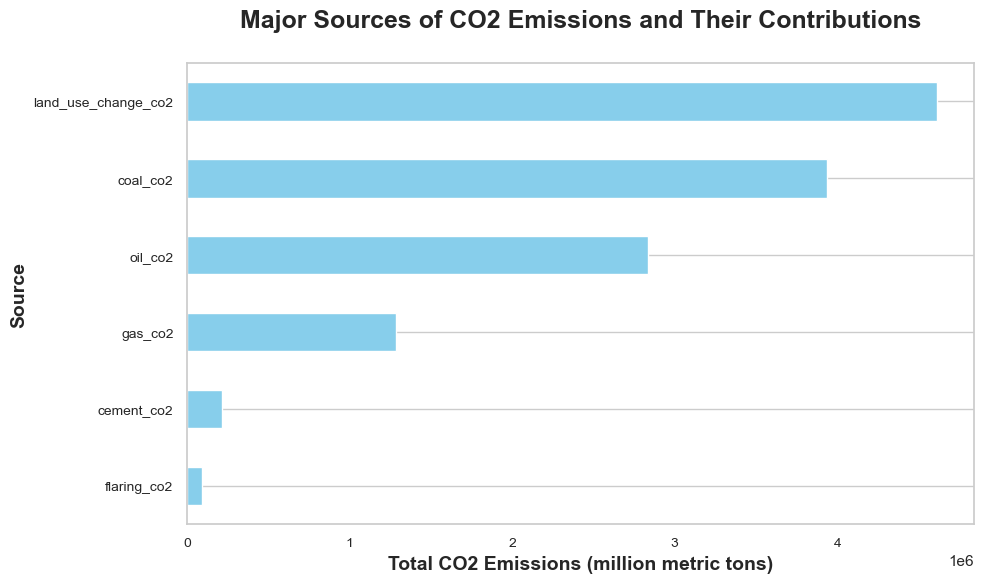

In [33]:
import matplotlib.pyplot as plt

# Select relevant columns for source-wise emissions
sources_columns = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'land_use_change_co2']
sources_data = df[sources_columns]

# Calculate the total emissions for each source
total_emissions_by_source = sources_data.sum()

# Plot a bar chart to visualize the contributions of different sources
plt.figure(figsize=(10, 6))
total_emissions_by_source.sort_values().plot(kind='barh', color='skyblue')

plt.title('Major Sources of CO2 Emissions and Their Contributions', fontsize=18, fontweight='bold', y=1.06)
plt.xlabel('Total CO2 Emissions (million metric tons)', fontsize=14, fontweight='bold')
plt.ylabel('Source', fontsize=14, fontweight='bold')
plt.grid(axis='x')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

plt.show()


Major sources of CO2 Emissions led by land use change, followed by coal, oil, gas, cement, and flaring. 

## How does energy consumption per capita vary across countries and what factors influence it?

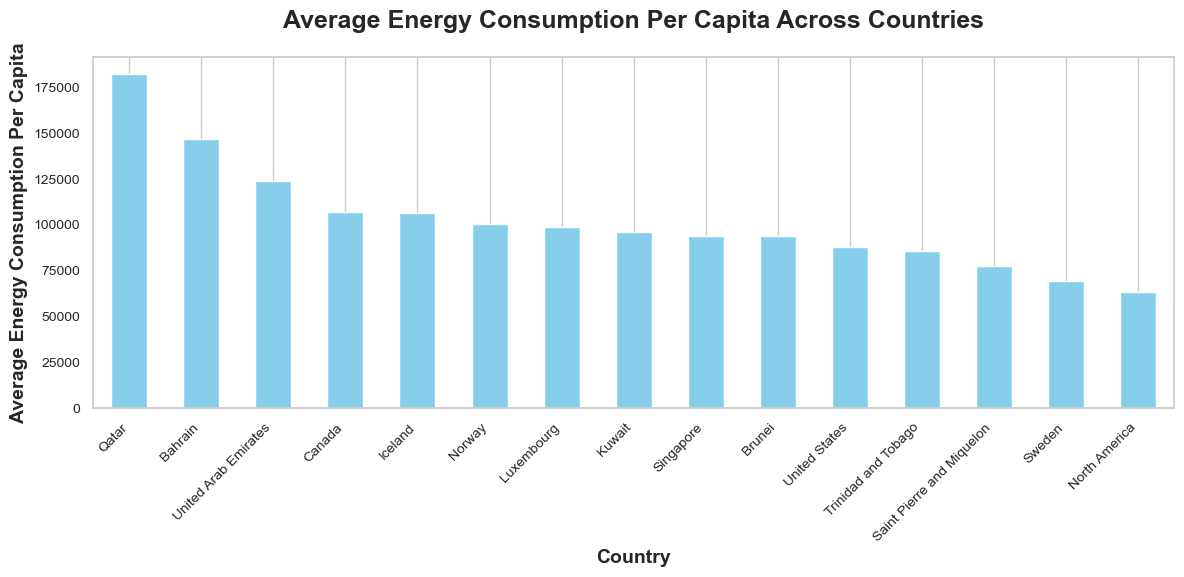

In [97]:
import matplotlib.pyplot as plt

# Group by country and calculate the average energy consumption per capita
avg_energy_per_capita_by_country = df.groupby('country')['energy_per_capita'].mean().sort_values(ascending=False)

# Plot a bar chart to visualize the variation in energy consumption per capita across countries
plt.figure(figsize=(12, 6))

avg_energy_per_capita_by_country[:15].plot(kind='bar', color='skyblue')

plt.title('Average Energy Consumption Per Capita Across Countries', fontsize=18, fontweight='bold', y=1.06)
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Average Energy Consumption Per Capita', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

plt.show()


The nations with the highest average energy consumption per capita are led by Qatar, surpassing 175,000 tonnes per capita, followed by Bahrain with approximately 140,000 tonnes per capita, and the UAE with around 125,000 tonnes per capita of energy consumption per capita.

### Hypothesis Testing

##  Is there a positive correlation between economic growth (GDP) and CO2 emissions?

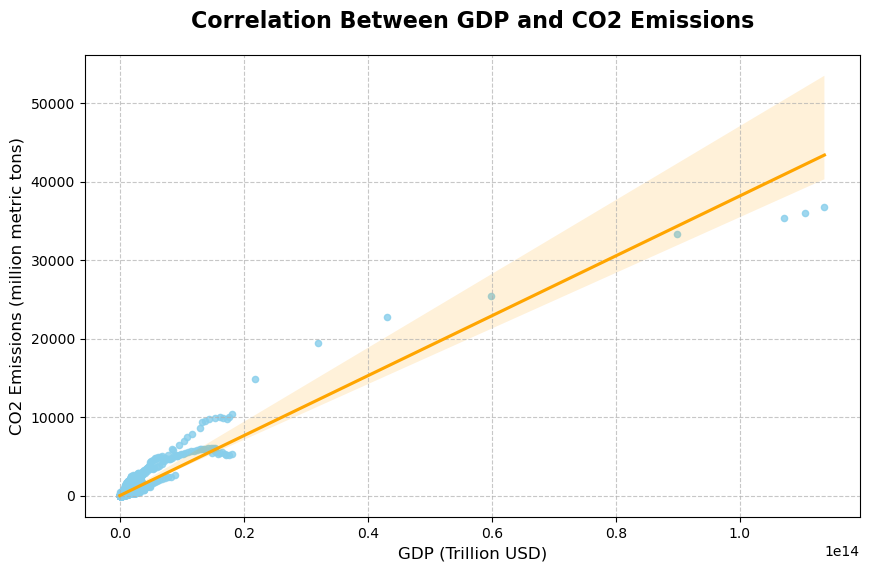

In [4]:
import seaborn as sns

# Set the color palette
sns.set_palette("pastel")

# Scatter plot with regression line to visualize the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='gdp', y='co2', data=df, scatter_kws={'s': 20, 'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.title('Correlation Between GDP and CO2 Emissions', fontsize=16, fontweight='bold', y=1.04)
plt.xlabel('GDP (Trillion USD)', fontsize=12)
plt.ylabel('CO2 Emissions (million metric tons)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [5]:
# check the lebgth of variables before doing the hypotheses analysis

print("Length of 'gdp':", len(df['gdp'].dropna()))
print("Length of 'co2':", len(df['co2'].dropna()))


Length of 'gdp': 14564
Length of 'co2': 30308


In [6]:
import pandas as pd

# Make a copy of the dataset before preprocessing data
df_copy_gdp_co2 = df.copy()


In [7]:
# Drop missing values from the copied dataset
df_copy_gdp_co2.dropna(subset=['gdp', 'co2'], inplace=True)

# Now, df_copy_gdp_co2 is a version of dataset without missing values in the 'gdp' and 'co2' columns


In [8]:
# Check the length of 'gdp' and 'co2' columns
length_gdp = len(df_copy_gdp_co2['gdp'])
length_co2 = len(df_copy_gdp_co2['co2'])

print("Length of 'gdp':", length_gdp)
print("Length of 'co2':", length_co2)


Length of 'gdp': 13524
Length of 'co2': 13524


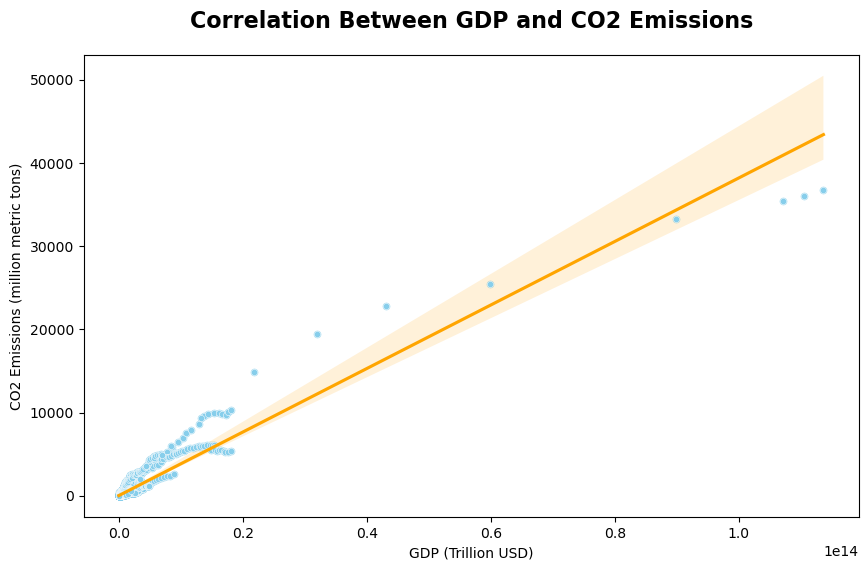

In [9]:
import warnings
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a scatter plot to visually inspect the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='gdp', y='co2', data=df_copy_gdp_co2, scatter_kws={'s': 20, 'color': 'skyblue'}, line_kws={'color': 'orange'}) #add regplot cos it doesnt appear automaticallt now after the cleaning process
sns.scatterplot(x='gdp', y='co2', data=df_copy_gdp_co2, color='skyblue', s=20)
plt.title('Correlation Between GDP and CO2 Emissions', fontsize=16, fontweight='bold', y=1.04)
plt.xlabel('GDP (Trillion USD)')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.show()


In [11]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_copy_gdp_co2['gdp'], df_copy_gdp_co2['co2'])
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")


Correlation Coefficient: 0.9547
P-value: 0.0000


In [22]:
# Set the significance level
alpha = 0.05

# Perform hypothesis testing
if p_value < alpha:
    print("Hypothesis test: Reject the null hypothesis (significant correlation).")
else:
    print("Hypothesis test: Fail to reject the null hypothesis (no significant correlation).")


Hypothesis test: Reject the null hypothesis (significant correlation).


This value is close to 1, indicating a very strong positive linear relationship between 'GDP' and 'CO2 Emissions.' The positive sign indicates that as 'GDP' increases, 'CO2 Emissions' also tends to increase. The p-value associated with the correlation coefficient is extremely small (practically zero). This suggests that the observed correlation is statistically significant, and we can reject the null hypothesis that there is no correlation between 'GDP' and 'CO2 Emissions.' The small p-value indicates high confidence in the observed correlation.

## Is land-use change significantly contributes to CO2 emissions?

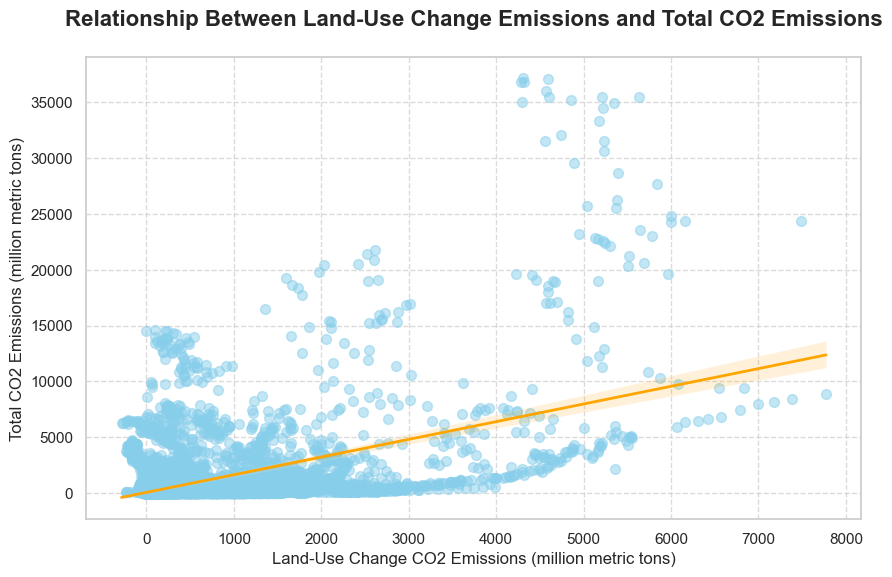

In [23]:
# Scatter plot to visualize the relationship between land-use change emissions and total CO2 emissions
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style using Seaborn
sns.set(style="whitegrid")

# Scatter plot with regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='land_use_change_co2', y='co2', data=df, scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'skyblue'},
            line_kws={'color': 'orange', 'linewidth': 2})
plt.title('Relationship Between Land-Use Change Emissions and Total CO2 Emissions', fontsize=16, fontweight='bold', y=1.05)
plt.xlabel('Land-Use Change CO2 Emissions (million metric tons)', fontsize=12)
plt.ylabel('Total CO2 Emissions (million metric tons)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [24]:
import pandas as pd
from scipy.stats import ttest_ind

# Membuat salinan baru dari dataset asli
df_landusechange_co2 = df.copy()


In [25]:
print("Length of 'land use change':", len(df_landusechange_co2['land_use_change_co2'].dropna()))
print("Length of 'co2':", len(df_landusechange_co2['co2'].dropna()))

Length of 'land use change': 37022
Length of 'co2': 30308


In [26]:
# Menghapus missing values di setiap variabel
df_landusechange_co2.dropna(subset=['co2', 'land_use_change_co2'], inplace=True)

# Mengecek panjang data setelah menghapus missing values
length_after = len(df_landusechange_co2)
print("Panjang data setelah menghapus missing values:", length_after)



Panjang data setelah menghapus missing values: 23320


In [27]:
#  access multiple columns using a list
print(df_landusechange_co2[['co2', 'land_use_change_co2']].describe())


                co2  land_use_change_co2
count  23320.000000         23320.000000
mean     357.046546           192.053773
std     1790.499355           605.120015
min        0.000000          -284.799000
25%        0.472000             0.344500
50%        5.460500             8.555000
75%       52.071500            47.293000
max    37149.785000          7773.274000


In [28]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_landusechange_co2['co2'], df_landusechange_co2['land_use_change_co2'])

# Display the results
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-value: {p_value:.4f}')

Pearson Correlation Coefficient: 0.5353
P-value: 0.0000


In [29]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Reject the null hypothesis: There is a significant correlation.


The Pearson correlation coefficient between 'CO2' and 'Land Use Change CO2' is approximately 0.5353, and the p-value is 0.0000. The correlation coefficient (r) measures the strength and direction of a linear relationship between two variables. In this case, the value of 0.5353 indicates a moderate positive correlation. A positive value (in this case, 0.5353) suggests that as one variable ('CO2') increases, the other variable ('Land Use Change CO2') tends to increase as well. The p-value associated with the correlation coefficient tests the null hypothesis that there is no correlation between the two variables. Interpretation: The extremely low p-value (0.0000) suggests that we reject the null hypothesis. There is strong evidence to suggest that there is a significant correlation between 'CO2' and 'Land Use Change CO2'.

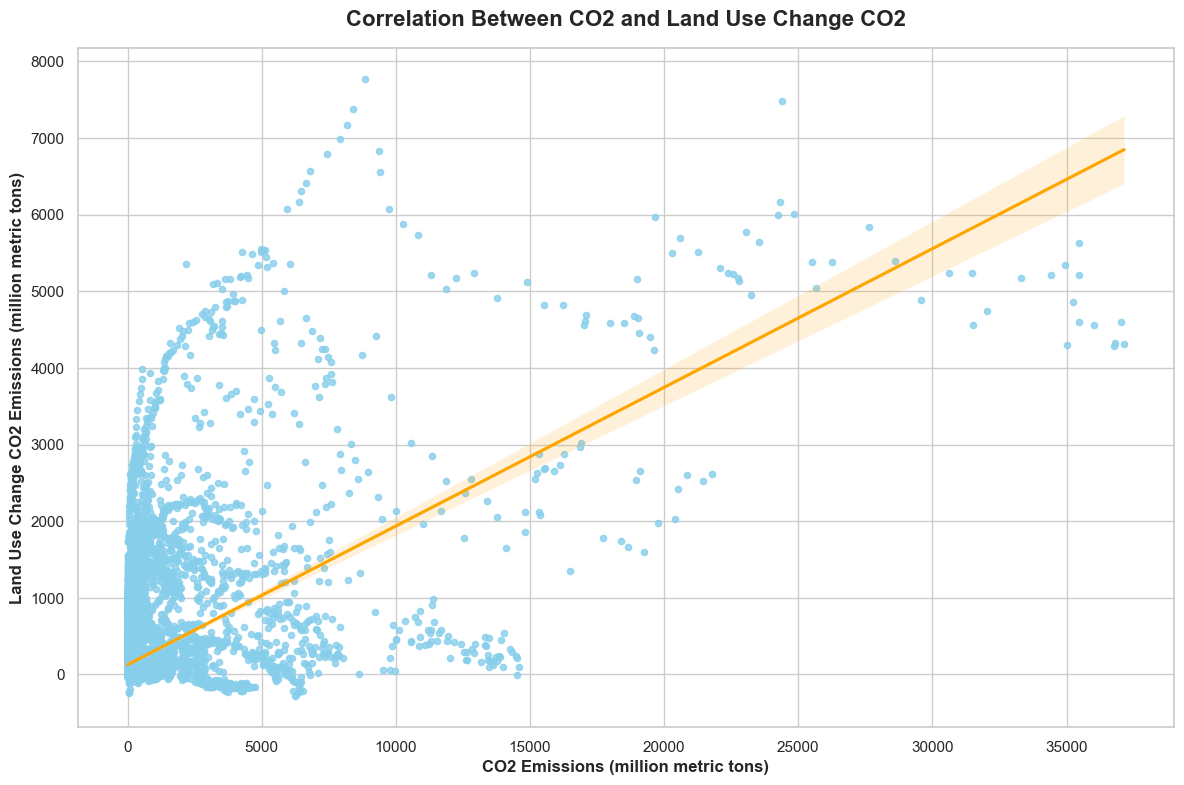

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='co2', y='land_use_change_co2', data=df_landusechange_co2, scatter_kws={'s': 20, 'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.title('Correlation Between CO2 and Land Use Change CO2', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('CO2 Emissions (million metric tons)', fontsize=12, fontweight='bold')
plt.ylabel('Land Use Change CO2 Emissions (million metric tons)', fontsize=12, fontweight='bold')
plt.grid(True)

# Add space between title and plot
plt.tight_layout()

plt.show()


### Conclusion

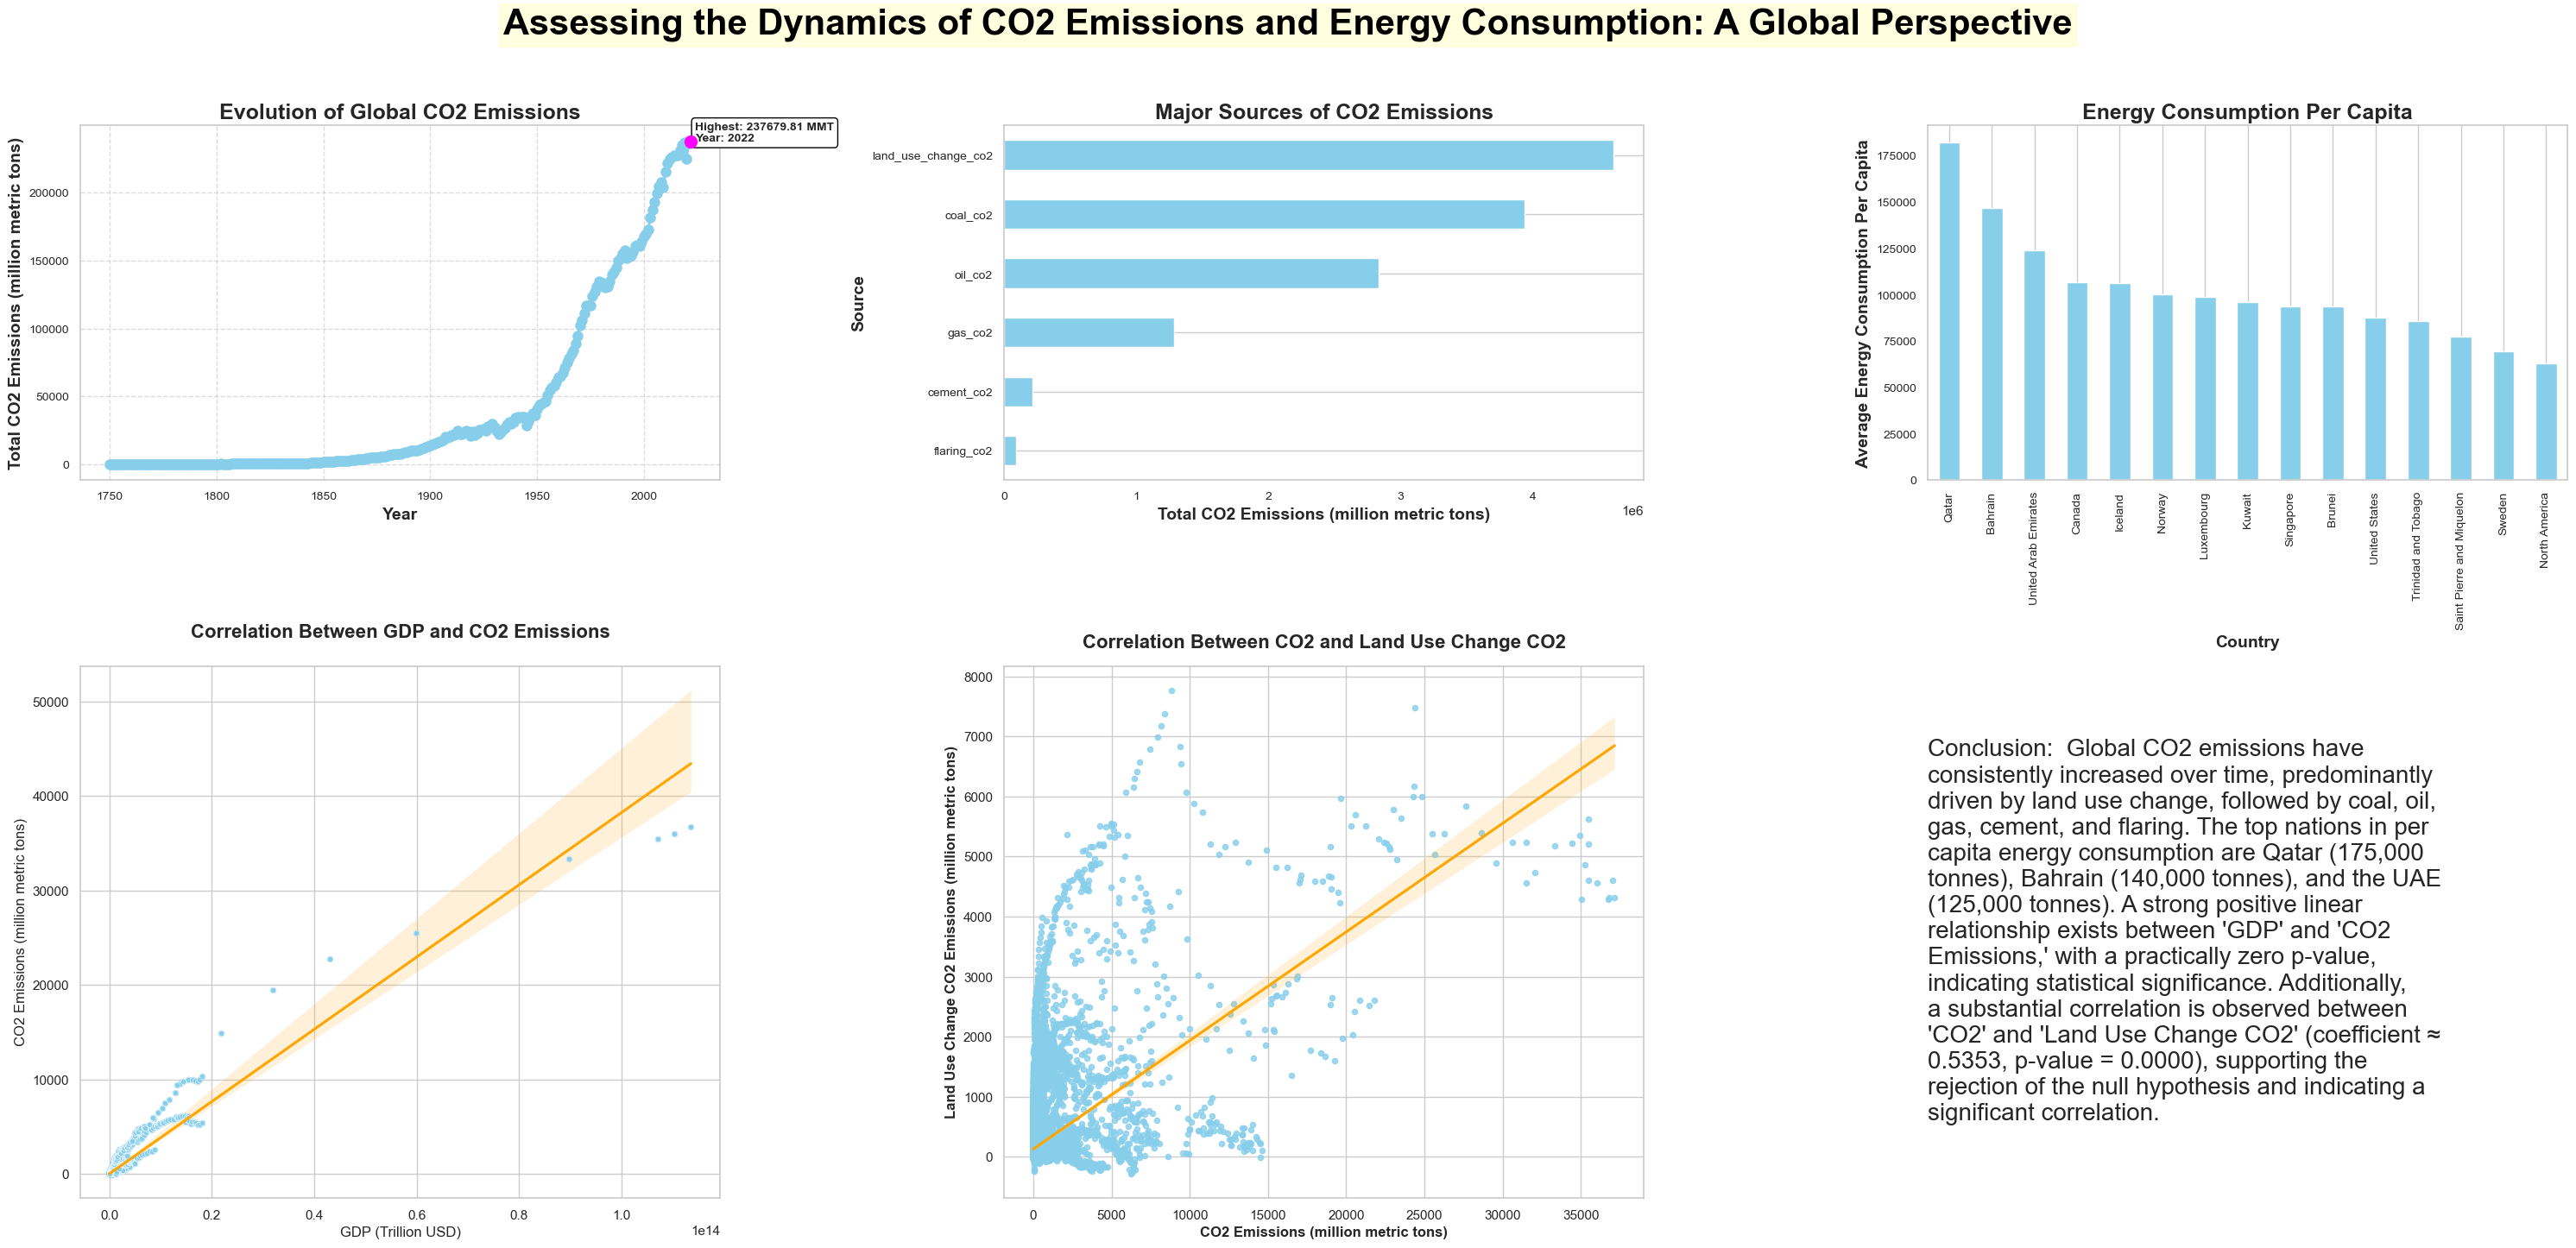

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Descriptive Analysis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15), gridspec_kw={'height_ratios': [2, 3]})  # Set the overall figure size
fig.suptitle('Assessing the Dynamics of CO2 Emissions and Energy Consumption: A Global Perspective',
             fontsize=30, fontweight='bold', color='black', backgroundcolor='lightyellow', y=0.95, va='center')

# Subplot 1: Evolution of Global CO2 Emissions Over the Years
global_emissions_by_year = df.groupby('year')['co2'].sum()
max_year = global_emissions_by_year.idxmax()
max_emissions = global_emissions_by_year.max()
axes[0, 0].plot(global_emissions_by_year.index, global_emissions_by_year.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
axes[0, 0].set_title('Evolution of Global CO2 Emissions', fontsize=18, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total CO2 Emissions (million metric tons)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)
axes[0, 0].scatter(max_year, max_emissions, color='magenta', s=100, zorder=5)
axes[0, 0].annotate(f'Highest: {max_emissions:.2f} MMT\nYear: {max_year}',
                    xy=(max_year, max_emissions),
                    xytext=(max_year + 2, max_emissions + 20),
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
                    arrowprops=dict(facecolor='black', arrowstyle="wedge,tail_width=0.7", alpha=0.5))
axes[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Subplot 2: Major Sources of CO2 Emissions and Their Contributions
sources_columns = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'land_use_change_co2']
sources_data = df[sources_columns]
total_emissions_by_source = sources_data.sum()
total_emissions_by_source.sort_values().plot(kind='barh', color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Major Sources of CO2 Emissions', fontsize=18, fontweight='bold')
axes[0, 1].set_xlabel('Total CO2 Emissions (million metric tons)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Source', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x')
axes[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Subplot 3: Variation in Energy Consumption Per Capita Across Countries
avg_energy_per_capita_by_country = df.groupby('country')['energy_per_capita'].mean().sort_values(ascending=False)
avg_energy_per_capita_by_country[:15].plot(kind='bar', color='skyblue', ax=axes[0, 2])
axes[0, 2].set_title('Energy Consumption Per Capita', fontsize=18, fontweight='bold')
axes[0, 2].set_xlabel('Country', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Average Energy Consumption Per Capita', fontsize=14, fontweight='bold')
axes[0, 2].tick_params(axis='both', which='major', labelsize=10)
axes[0, 2].grid(axis='y')

# Hypothesis Testing
# Subplot 4: Correlation Between GDP and CO2 Emissions
sns.regplot(x='gdp', y='co2', data=df_copy_gdp_co2, scatter_kws={'s': 20, 'color': 'skyblue'}, line_kws={'color': 'orange'}, ax=axes[1, 0])
sns.scatterplot(x='gdp', y='co2', data=df_copy_gdp_co2, color='skyblue', s=20, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Between GDP and CO2 Emissions', fontsize=16, fontweight='bold', y=1.04)
axes[1, 0].set_xlabel('GDP (Trillion USD)')
axes[1, 0].set_ylabel('CO2 Emissions (million metric tons)')

# Subplot 5: Land-use Change Contribution to CO2 Emissions
sns.regplot(x='co2', y='land_use_change_co2', data=df_landusechange_co2, scatter_kws={'s': 20, 'color': 'skyblue'}, line_kws={'color': 'orange'}, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Between CO2 and Land Use Change CO2', fontsize=16, fontweight='bold', y=1.02)
axes[1, 1].set_xlabel('CO2 Emissions (million metric tons)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Land Use Change CO2 Emissions (million metric tons)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True)

# Subplot 6: Text Box for Conclusion
axes[1, 2].axis('off')  # Hide axes in this subplot
conclusion_text = """Conclusion:\n
Global CO2 emissions have consistently increased over time, predominantly driven by land use change, followed by coal, oil, gas, cement, and flaring.
The top nations in per capita energy consumption are Qatar (175,000 tonnes), Bahrain (140,000 tonnes), and the UAE (125,000 tonnes).
A strong positive linear relationship exists between 'GDP' and 'CO2 Emissions,' with a practically zero p-value, indicating statistical significance.
Additionally, a substantial correlation is observed between 'CO2' and 'Land Use Change CO2' (coefficient ≈ 0.5353, p-value = 0.0000),
supporting the rejection of the null hypothesis and indicating a significant correlation."""
axes[1, 2].text(0, 0.5, textwrap.fill(conclusion_text, width=50), fontsize=20, va='center', ha='left')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()
